<a href="https://colab.research.google.com/github/LifnaJos/ADC601-Data-Analytics-Visualization/blob/DAV_Colab_Notebooks/MLR_using_R_(Part_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiple Linear Regression using R**
Courtesy :
- Prof. Yibi Huang, Department of Statistics, University of Chicago
- Analysis prepared based on [STAT 224 Lecture 2 Multiple Linear Regression, Part 2](https://www.stat.uchicago.edu/~yibi/teaching/stat224/L03.pdf)

## **Example: The Trees Data**

The trees data are measurements of the diameter, height and volume of timber in 31 felled black cherry trees. The variables are
* Girth: Tree diameter (rather than girth, actually) in inches measured at 4 ft 6 in above the ground
* Height: Height in ft
* Volume: Volume of timber in cubic ft

- The trees data are build-in in R.

In [26]:
data("trees")

In [27]:
# Rename the misleading Girth variable as Diameter
trees$Diameter = trees$Girth

### **Pairwise Scatter Plots**

In [28]:
library(ggplot2)

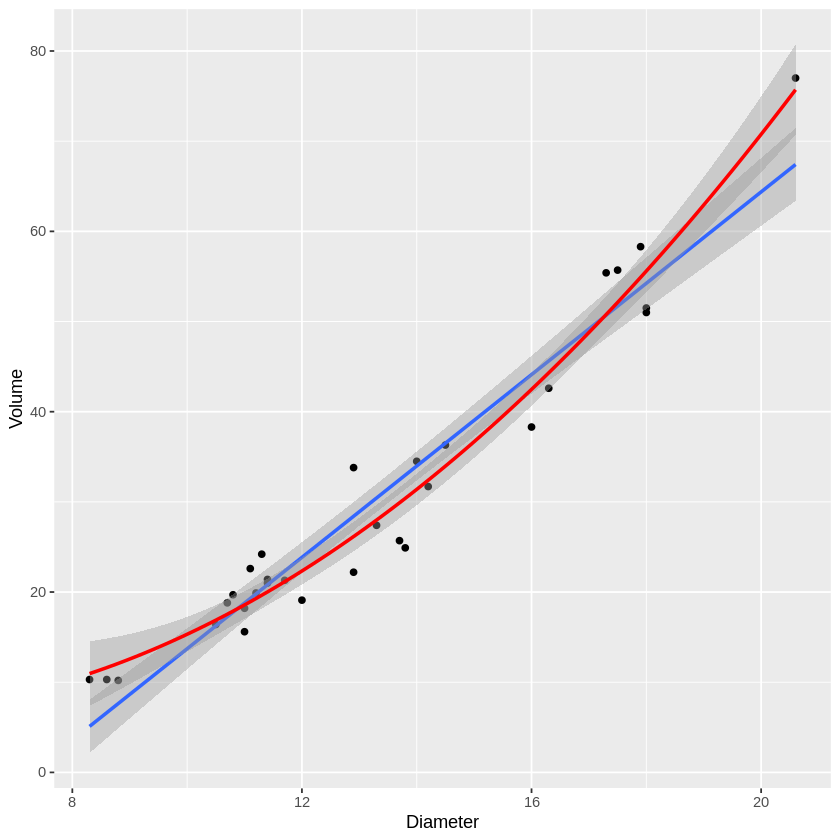

In [29]:
ggplot(trees, aes(x=Diameter, y=Volume)) + geom_point() + geom_smooth(method='lm', formula='y~x') + geom_smooth(method='lm', formula='y~x+I(x^2)', col="red")

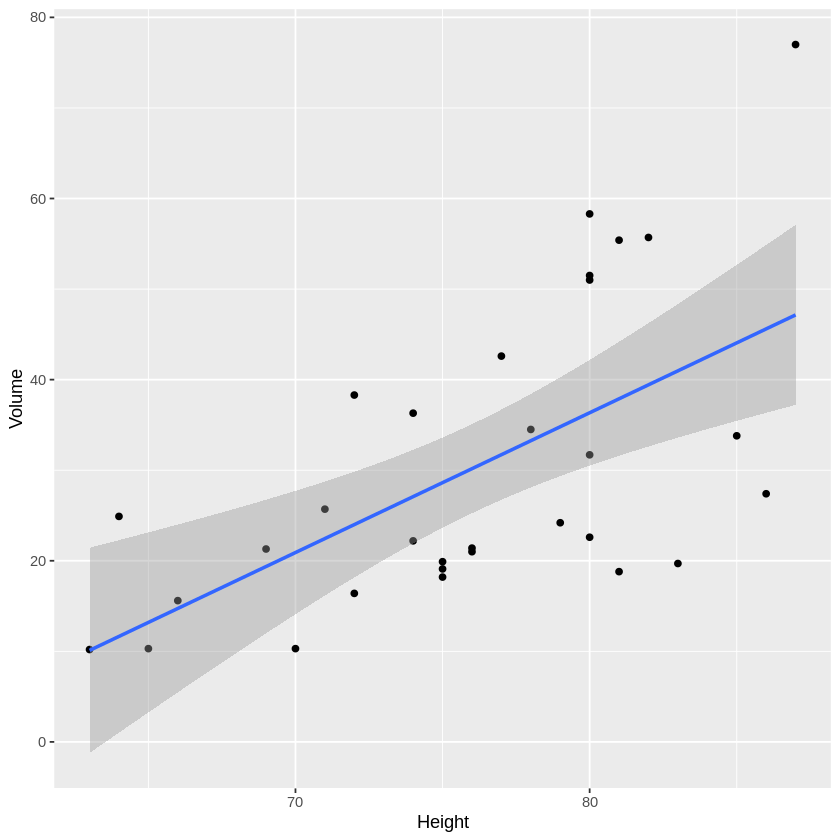

In [30]:
ggplot(trees, aes(x=Height, y=Volume)) + geom_point() + geom_smooth(method='lm', formula='y~x')

Observations
* slight non-linearity between Diameter & Volume
* Variability of Volume increases w/ Height

### **After Log-Transformation**

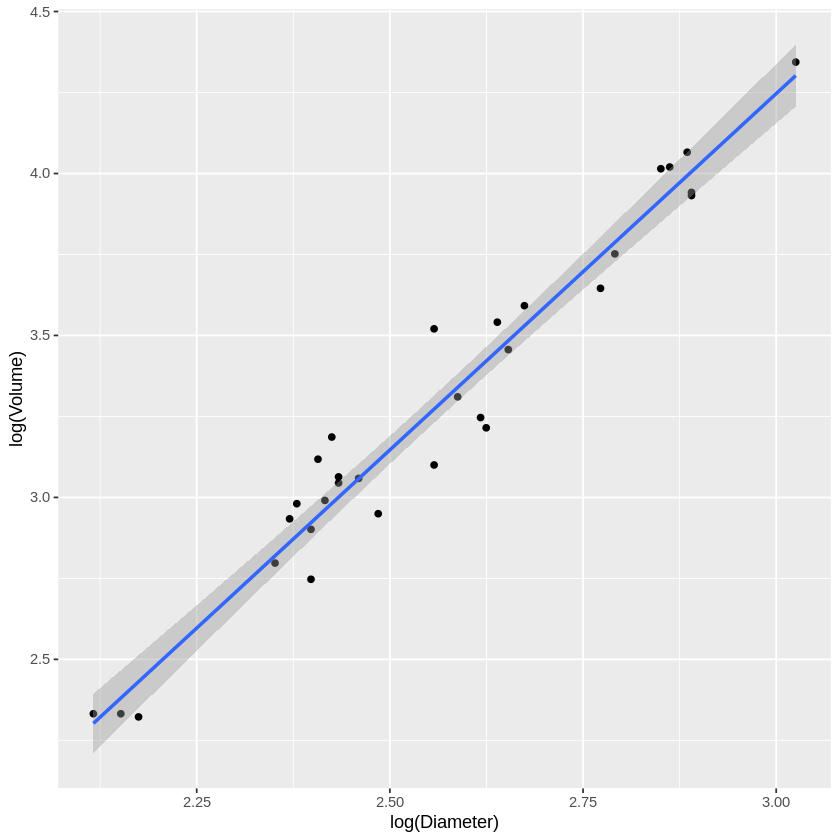

In [31]:
ggplot(trees, aes(x=log(Diameter), y=log(Volume))) + geom_point() + geom_smooth(method='lm', formula='y~x')

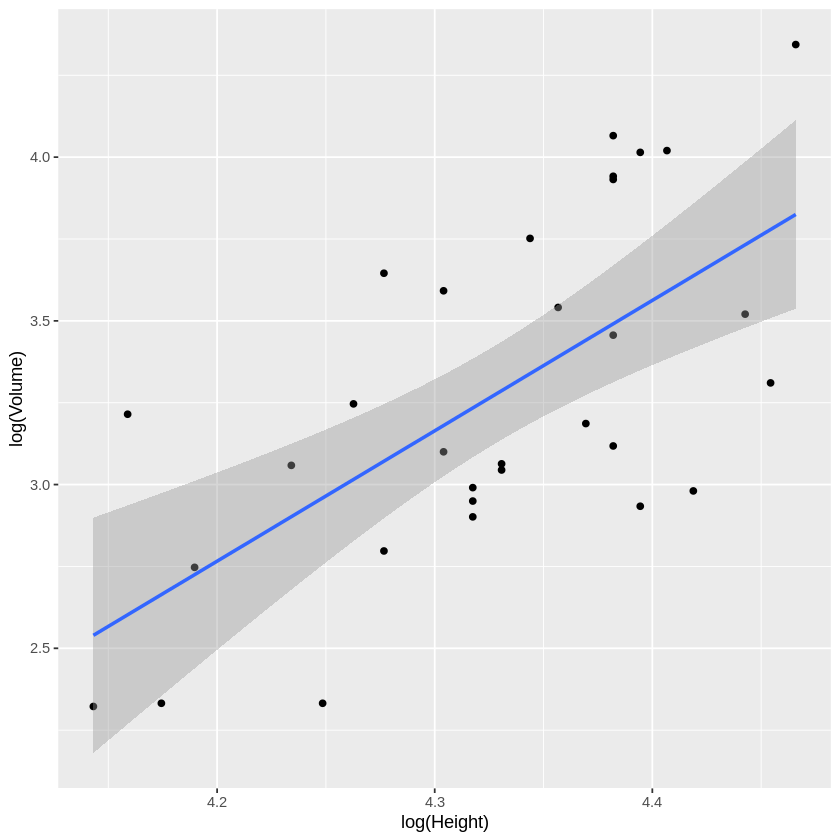

In [32]:
ggplot(trees, aes(x=log(Height), y=log(Volume))) + geom_point() + geom_smooth(method='lm', formula='y~x')

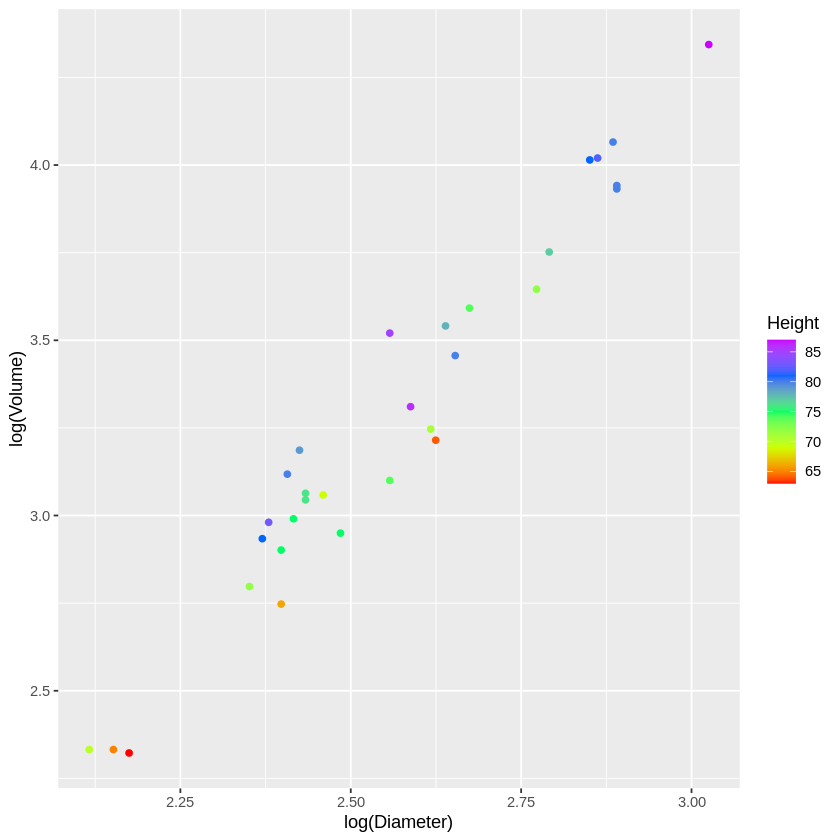

In [33]:
ggplot(trees, aes(x=log(Diameter), y=log(Volume), color=Height)) + geom_point() + scale_color_gradientn(colours = rainbow(5))

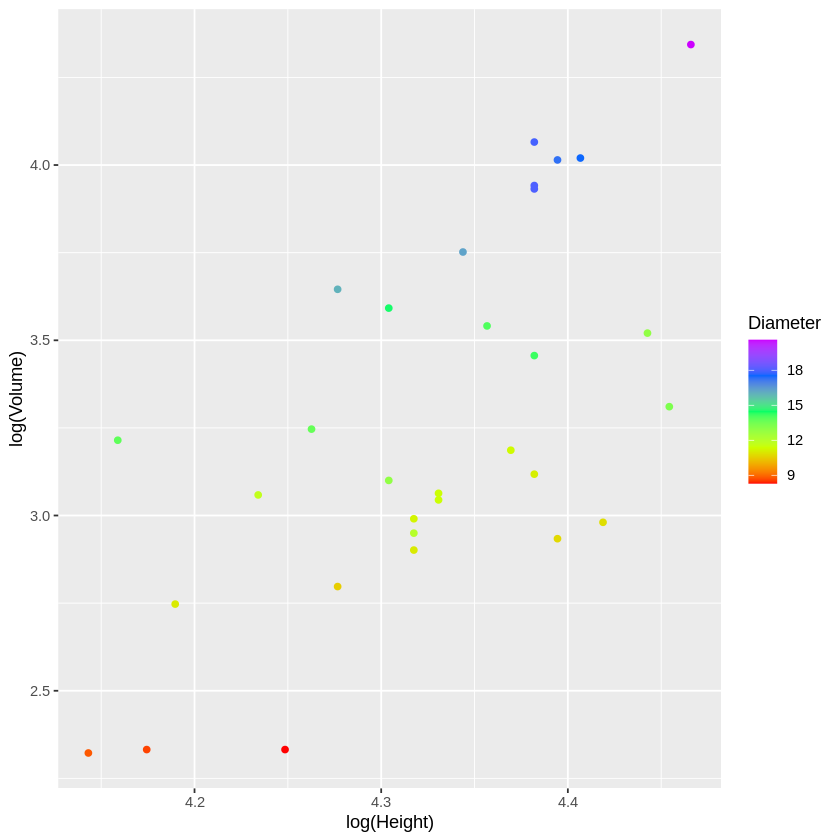

In [34]:
ggplot(trees, aes(x=log(Height), y=log(Volume), color=Diameter)) + geom_point() + scale_color_gradientn(colours = rainbow(5))

In [35]:
trees$diameter = cut(trees$Diameter, breaks=c(8,9,12,15,18,21), labels=c("8-9","9-12", "12-15", "15-18","18-21"))

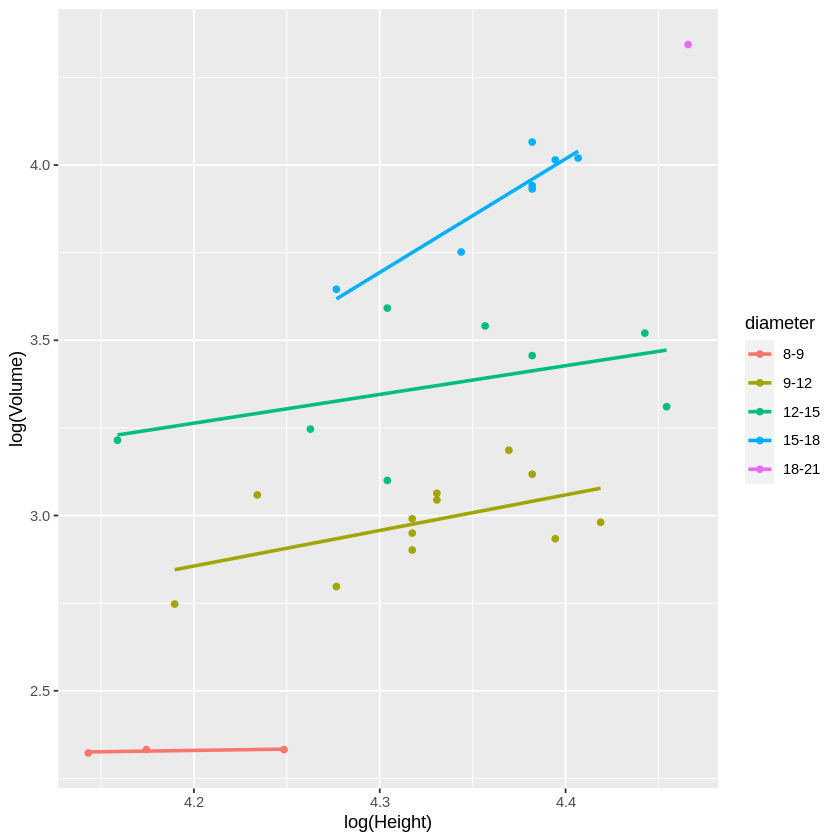

In [36]:
ggplot(trees, aes(x=log(Height), y=log(Volume), color=diameter)) + geom_point() + geom_smooth(method='lm', formula='y~x', se=F)

### **Model for the Timber Volume of Trees**

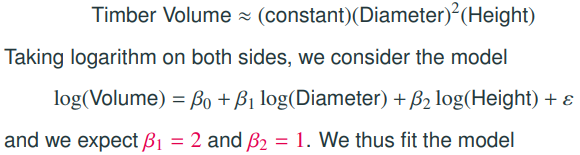

In [37]:
lmtrees = lm(log(Volume) ~ log(Diameter) + log(Height), data=trees)
lmtrees$coef

(Intercept) log(Diameter)   log(Height) 
    -6.631617      1.982650      1.117123

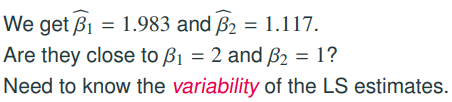

## **Standard Errors & Distributions od Least Square Estimates**

### **Least Squares Estimates Are Unbiased**

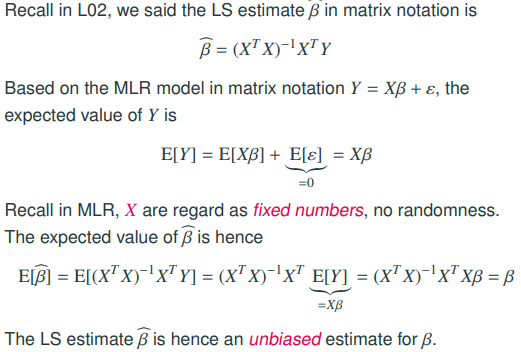

### **Variance of the LS Estimate β-hat**

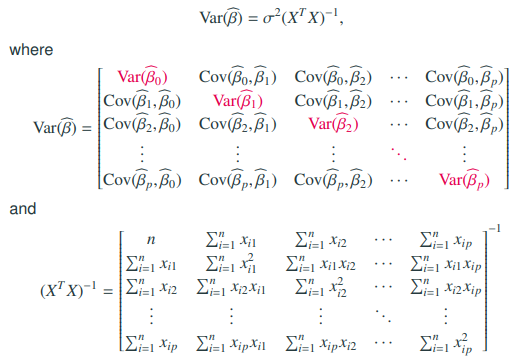

### **Variance of the LS Estimates for SLR**

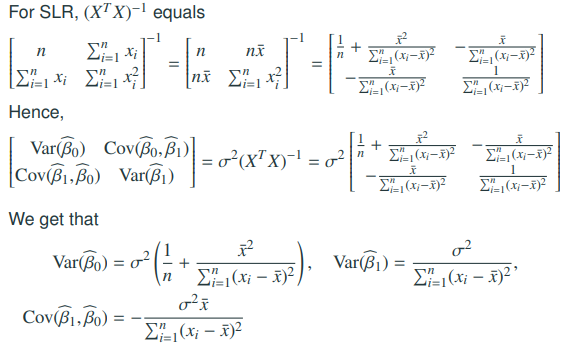

### **Greater Variability in X, Better Estimate for Slope (SLR)**

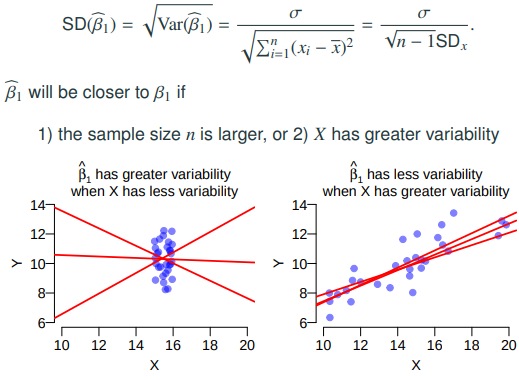

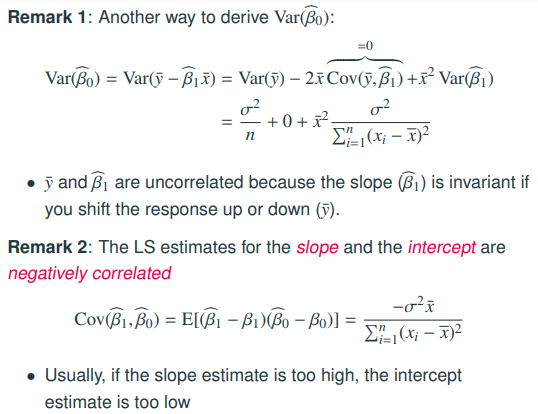

### **Standard Error (s.e.) of the LS Estimate**

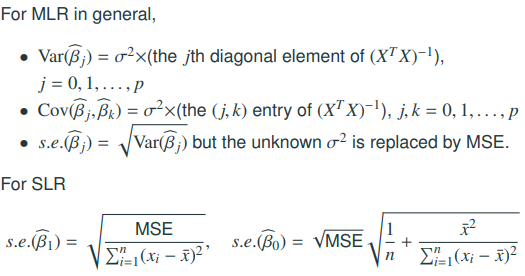

In [38]:
lmtrees = lm(log(Volume) ~ log(Diameter) + log(Height), data=trees)
summary(lmtrees)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-6.631617,0.79978973,-8.291701,5.057138e-09
log(Diameter),1.982650,0.07501061,26.431592,2.422550e-21
log(Height),1.117123,0.20443706,5.464388,7.805278e-06


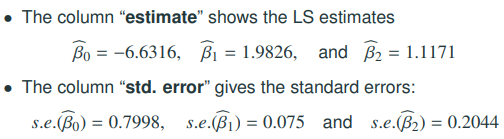

In [39]:
lmtrees = lm(log(Volume) ~ log(Diameter) + log(Height), data=trees)
summary(lmtrees)


Call:
lm(formula = log(Volume) ~ log(Diameter) + log(Height), data = trees)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.168561 -0.048488  0.002431  0.063637  0.129223 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -6.63162    0.79979  -8.292 5.06e-09 ***
log(Diameter)  1.98265    0.07501  26.432  < 2e-16 ***
log(Height)    1.11712    0.20444   5.464 7.81e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.08139 on 28 degrees of freedom
Multiple R-squared:  0.9777,	Adjusted R-squared:  0.9761 
F-statistic: 613.2 on 2 and 28 DF,  p-value: < 2.2e-16


## **Hypothesis Tests & Confidence Intervals for Coefficients**

### **t-Test of a Single βj**

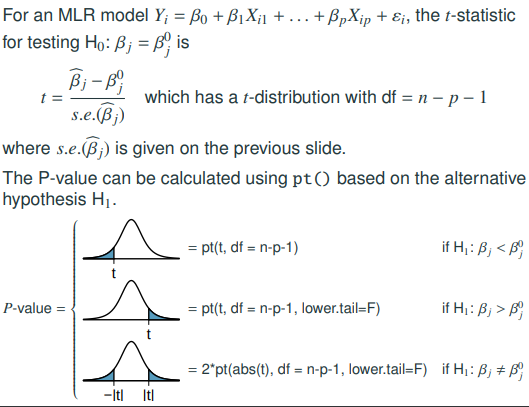

In [40]:
summary(lmtrees)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-6.631617,0.79978973,-8.291701,5.057138e-09
log(Diameter),1.982650,0.07501061,26.431592,2.422550e-21
log(Height),1.117123,0.20443706,5.464388,7.805278e-06


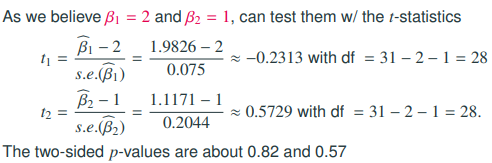

In [41]:
2*pt(0.2313, df = 28, lower.tail=F)

[1] 0.8187637

In [42]:
2*pt(0.5729, df = 28, lower.tail=F)

[1] 0.5712849

That is, “Volume ≈ (Diameter)^2 (Height)” seems reasonable.

In [43]:
summary(lmtrees)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-6.631617,0.79978973,-8.291701,5.057138e-09
log(Diameter),1.982650,0.07501061,26.431592,2.422550e-21
log(Height),1.117123,0.20443706,5.464388,7.805278e-06


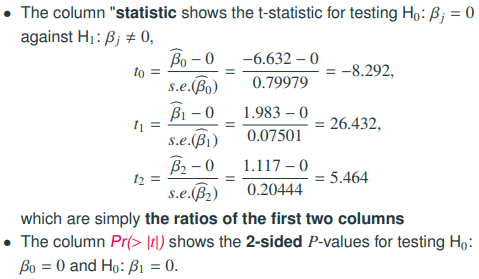

### **Digression: Checking Non-Linearity**

- Recall we said earlier that the relation between Volume and Diameter is slightly nonlinear.
- We can check nonlinearity by fitting the polynomial model

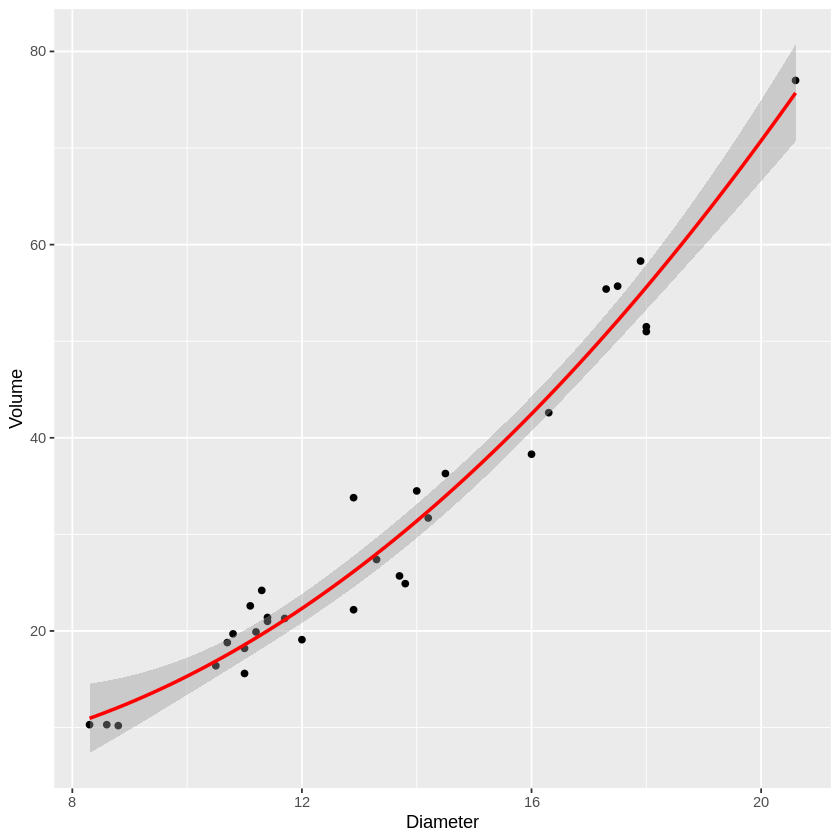

In [44]:
ggplot(trees, aes(x=Diameter, y=Volume)) + geom_point() + geom_smooth(method='lm', formula='y~x+I(x^2)', col="red")

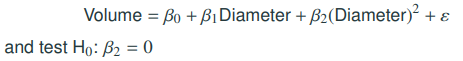

In [45]:
lm2 = lm(Volume ~ Diameter + I(Diameter^2), data=trees)
summary(lm2)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),10.7862655,11.2228199,0.9611012,0.344728171
Diameter,-2.0921396,1.6473417,-1.2700095,0.214534409
I(Diameter^2),0.2545376,0.0581716,4.3756327,0.000152389


### **Confidence Intervals For Coefficients**

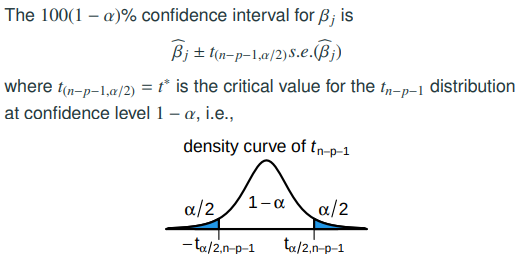

In [51]:
alpha = 0.05

In [48]:
n = 31

In [49]:
p = 2

In [52]:
qt(alpha/2, df=n-p-1, lower.tail=FALSE)

[1] 2.048407

In [59]:
qt(1-alpha/2, df=n-p-1)

[1] 2.048407

### **Example: CI for β1**

In [56]:
summary(lmtrees)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-6.631617,0.79978973,-8.291701,5.057138e-09
log(Diameter),1.982650,0.07501061,26.431592,2.422550e-21
log(Height),1.117123,0.20443706,5.464388,7.805278e-06


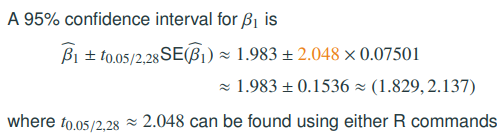

In [57]:
qt(0.05/2, df=28, lower.tail=F)

[1] 2.048407

In [58]:
qt(0.975, df=28)

[1] 2.048407

### **Finding CIs for Coefficients Using confint()**

In [60]:
confint(lmtrees)

,2.5 %,97.5 %
(Intercept),-8.269912,-4.993322
log(Diameter),1.828998,2.136302
log(Height),0.698353,1.535894


In [62]:
confint(lmtrees, level = 0.9) # changing the confidence level to 90%

,5 %,95 %
(Intercept),-7.9921642,-5.271070
log(Diameter),1.8550470,2.110253
log(Height),0.7693491,1.464898


In [63]:
confint(lmtrees, level = 0.95, "log(Diameter)")

,2.5 %,97.5 %
log(Diameter),1.828998,2.136302


In [64]:
confint(lmtrees, level = 0.95, "(Intercept)")

,2.5 %,97.5 %
(Intercept),-8.269912,-4.993322


## **Example: Fire Damage Data**

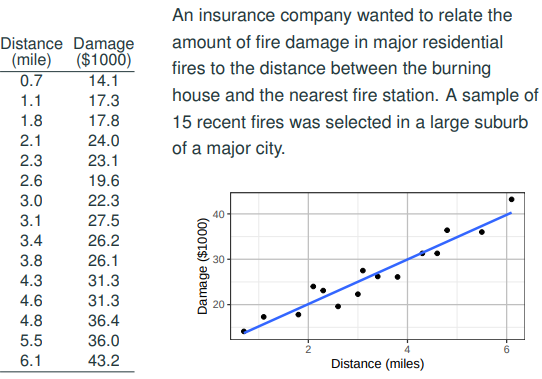

In [65]:
fire = data.frame(
dist=c(0.7,1.1,1.8,2.1,2.3,2.6,3.0,3.1,3.4,3.8,4.3,4.6,4.8,5.5,6.1),
damage=c(14.1,17.3,17.8,24.0,23.1,19.6,22.3,27.5,26.2,26.1,31.3,
31.3,36.4,36.0,43.2)
)

In [66]:
lmfire = lm(damage ~ dist, data=fire)
lmfire$coef

(Intercept)        dist 
  10.277929    4.919331

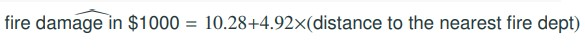

* The intercept 10.278 means that the predicted amount of fire damage for houses located right next to a fire station is 10,278 dollars.
* The slope 4.919 means that every extra mile from the nearest fire station increases the amount of fire damage by $4919 on average

### **Example: Test for the Slope β1**

In [67]:
summary(lmfire)


Call:
lm(formula = damage ~ dist, data = fire)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4682 -1.4705 -0.1311  1.7915  3.3915 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  10.2779     1.4203   7.237 6.59e-06 ***
dist          4.9193     0.3927  12.525 1.25e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.316 on 13 degrees of freedom
Multiple R-squared:  0.9235,	Adjusted R-squared:  0.9176 
F-statistic: 156.9 on 1 and 13 DF,  p-value: 1.248e-08


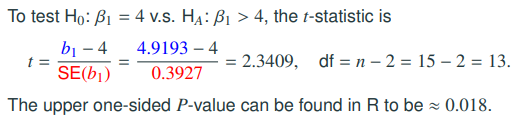

In [68]:
pt(2.3409, df=13, lower.tail=F)

[1] 0.01791422

**Conclusion:** At 5% level, the extra amount of damage for every extra mile from the nearest fire station is significantly higher than $4000 on average.

### **Example: CI for β1**

In [69]:
summary(lmfire)


Call:
lm(formula = damage ~ dist, data = fire)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4682 -1.4705 -0.1311  1.7915  3.3915 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  10.2779     1.4203   7.237 6.59e-06 ***
dist          4.9193     0.3927  12.525 1.25e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.316 on 13 degrees of freedom
Multiple R-squared:  0.9235,	Adjusted R-squared:  0.9176 
F-statistic: 156.9 on 1 and 13 DF,  p-value: 1.248e-08


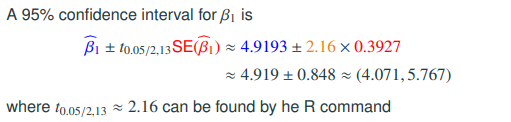

In [70]:
qt(0.05/2, df=13, lower.tail=F)

[1] 2.160369

In [71]:
confint(lmfire, "dist")

,2.5 %,97.5 %
dist,4.070851,5.767811


**Interpretation**: We have 95% confidence that every extra mile from the nearest fire station increases the amount of damage by 4071 dollars to $ 5767 on average